In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',100)
sns.set(rc={'figure.figsize':(18,8)})
matplotlib.rcParams['agg.path.chunksize'] = 100000

C:\Users\as19238\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\as19238\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\as19238\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\as19238\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\as19238\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:

In [2]:
train_data = pd.read_csv('../Data/pubg/train.csv')
test_data = pd.read_csv('../Data/pubg/test.csv')

In [3]:
sample_data,_ = train_test_split(train_data, test_size = 0.7)

# Data Summary

* **DBNOs** - Number of enemy players knocked. **important**
* **assists** - Number of enemy players this player damaged that were killed by teammates.
* **boosts** - Number of boost items used. **important**
* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
* **headshotKills** - Number of enemy players killed with headshots. **important**
* **heals** - Number of healing items used.
* **killPlace** - Ranking in match of number of enemy players killed.
* **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **kills** - Number of enemy players killed.
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistanc** - Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
* **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* **numGroups** - Number of groups we have data for in the match.
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** - The **target** of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [6]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [11]:
print('Shape of the dataset:  ',end = '')
print(train_data.shape)

Shape of the dataset:  (4357336, 26)


In [9]:
print('Data types of the dataset:\n')
print(train_data.dtypes)

Data types of the dataset:

Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


In [10]:
pandas_profiling.ProfileReport(train_data)

Number of variables,26
Number of observations,4357336
Total Missing (%),0.0%
Total size in memory,864.3 MiB
Average record size in memory,208.0 B
Numeric,25
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# Data Exploration

In [4]:
sample_data = sample_data[~((sample_data.DBNOs > 20) & (sample_data.winPlacePerc < 1.6))]

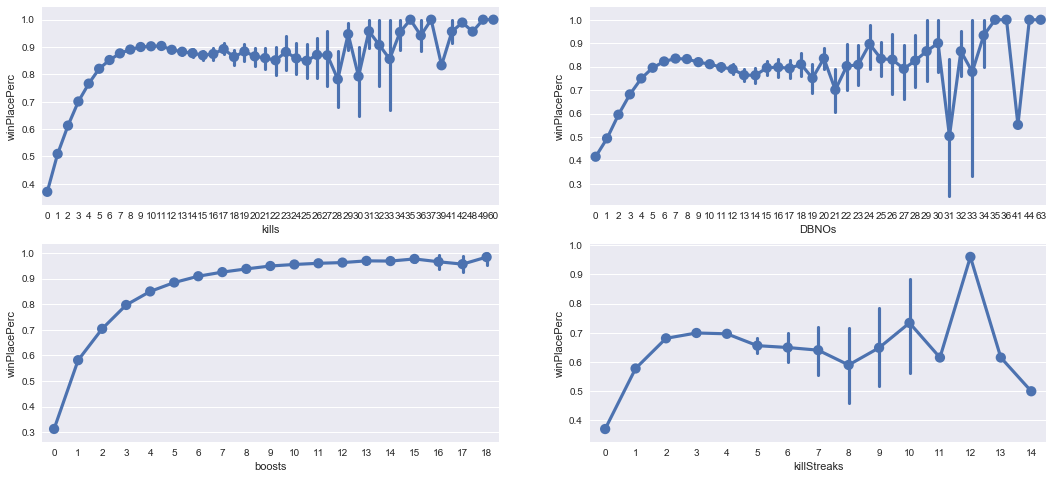

In [45]:
plt.subplot(221)
sns.pointplot(train_data.kills, train_data.winPlacePerc)
plt.subplot(222)
sns.pointplot(train_data.DBNOs,train_data.winPlacePerc)
plt.subplot(223)
sns.pointplot(train_data.boosts, train_data.winPlacePerc)
plt.subplot(224)
sns.pointplot(train_data.killStreaks, train_data.winPlacePerc)


ValueError: `bins` must increase monotonically, when an array

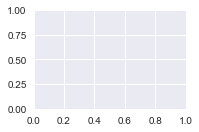

In [7]:
plt.subplot(221)
plt.hist(sample_data.sort_values('kills').kills, sample_data.sort_values('kills').winPlacePerc)
# plt.subplot(222)
# sns.pointplot(train_data.headshotKills,train_data.winPlacePerc)
# plt.subplot(223)
# sns.pointplot(train_data.kills,train_data.winPlacePerc)
# plt.subplot(224)
# sns.pointplot(train_data.kills, train_data.winPlacePerc)

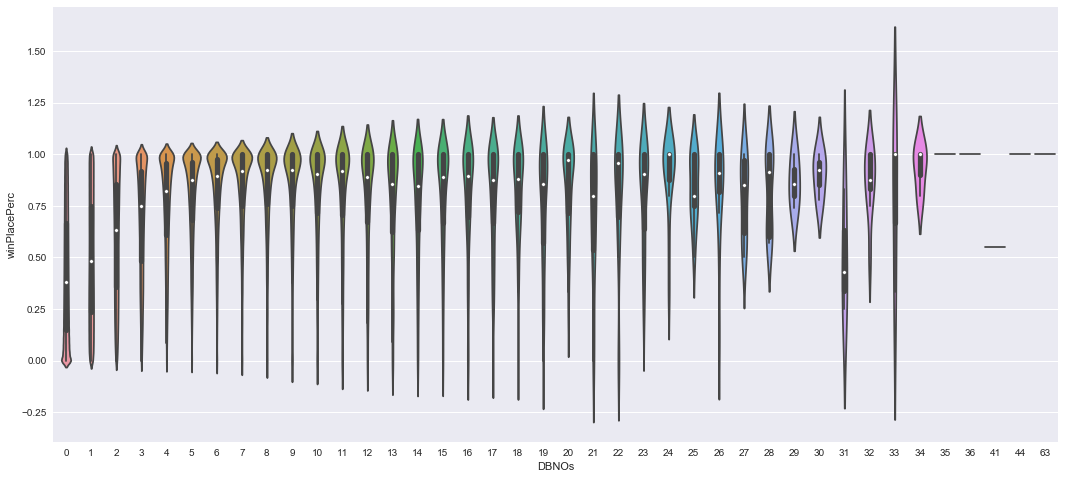

In [46]:
sns.violinplot(train_data.DBNOs, train_data.winPlacePerc)

In [53]:
train_data[(train_data.DBNOs > 30 ) & (train_data.winPlacePerc < 0.6)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
230896,312725,1318240,39965,5,1,2800.0,31,7,15,1,1000,30,3,100.00,5,5,5,0.0,0,0.0,1,0,72.82,37,1500,0.2500
444634,628738,225198,15075,5,1,3082.0,31,8,17,3,1000,27,3,98.32,8,8,1,0.0,0,0.0,0,0,25.31,51,1500,0.4286
619644,864986,1642209,47345,8,1,3586.0,33,6,7,3,1000,32,2,98.57,7,6,0,1614.0,0,0.0,1,0,1175.00,44,1500,0.3333
1518720,2169304,1899561,531,5,0,3003.0,32,8,4,1,1000,28,5,86.28,9,8,1,5113.0,0,0.0,0,0,1182.00,18,1500,0.5000
4196150,5982695,1120651,35486,0,1,501.6,41,0,5,59,971,0,0,0.00,30,30,41,3229.0,0,0.0,1,0,847.20,1,1491,0.5517


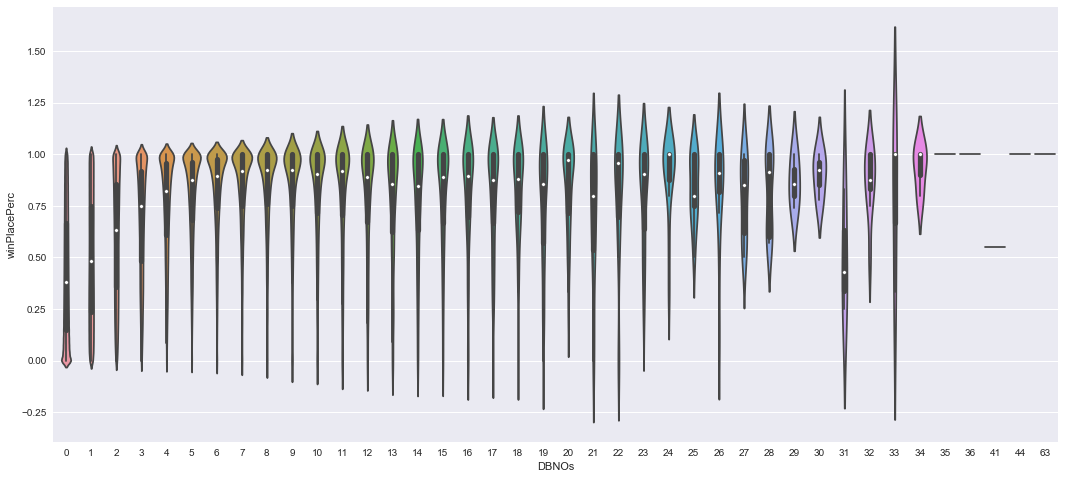

In [54]:
sns.violinplot(train_data.DBNOs, train_data.winPlacePerc)

In [61]:
list(train_data[(train_data.DBNOs > 30 ) & (train_data.winPlacePerc < 0.6)].index)

[230896, 444634, 619644, 1518720, 4196150]

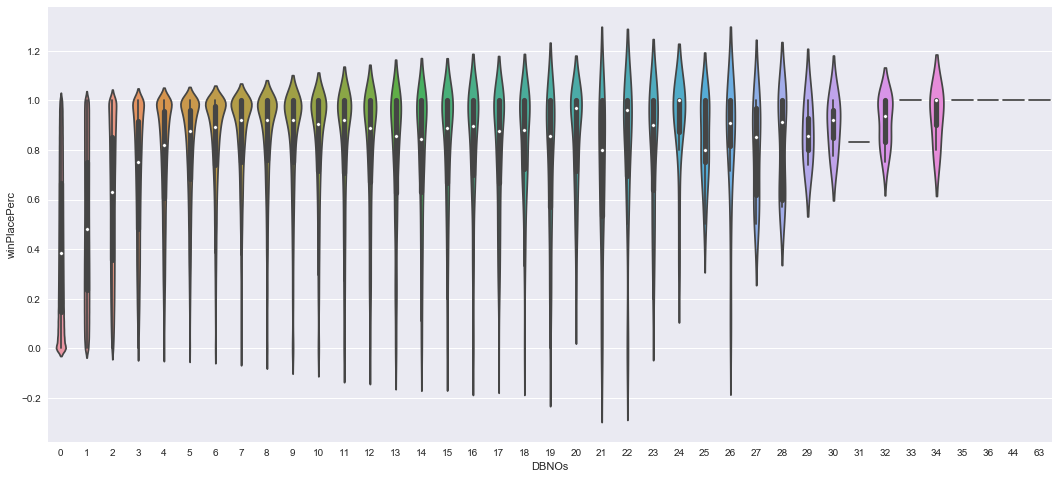

In [63]:
temp = train_data.drop(list(train_data[(train_data.DBNOs > 30 ) & (train_data.winPlacePerc < 0.6)].index))
sns.violinplot(temp.DBNOs, temp.winPlacePerc)

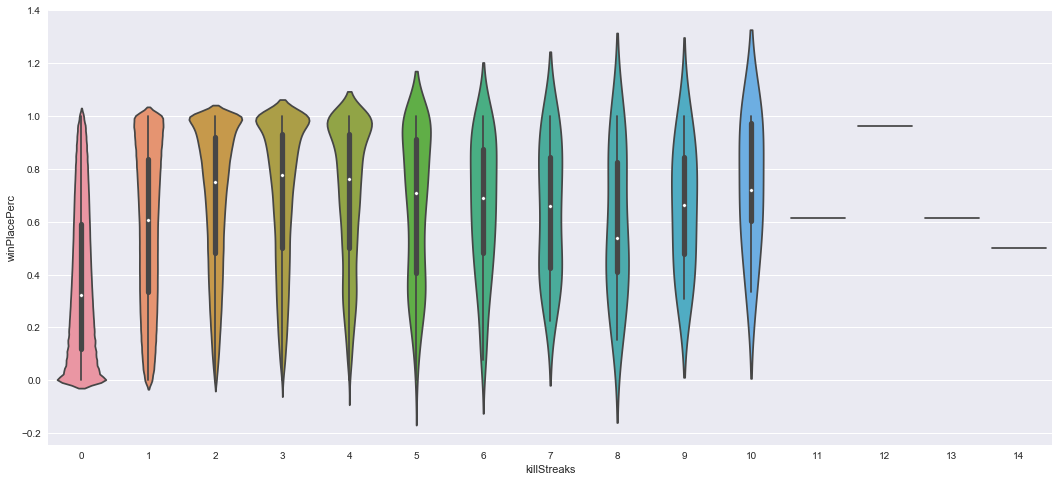

In [64]:
sns.violinplot(temp.killStreaks, temp.winPlacePerc)